In [73]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import linregress
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore') 

1.	How would you estimate the impact the weather has on Uber pickups?

            a.	Do certain weather conditions lead to an increase or decrease in pickups?

            b.	Are there any correlations between weather variables and pickups?


pickup_dt: Date and time of the data point.

borough: The borough in New York City (e.g., Bronx, Brooklyn, Manhattan, etc.).

pickups: The number of pickups recorded for that hour in the borough.

spd: Speed (assuming it's related to wind speed).

vsb: Visibility (assuming it's related to visibility conditions).

temp: Temperature.

dewp: Dew point.

slp: Sea level pressure.

pcp01: Precipitation in the last hour.

pcp06: Precipitation in the last 6 hours.

pcp24: Precipitation in the last 24 hours.

sd: Snow depth.

hday: A flag or indicator (perhaps for a holiday).

In [74]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("Resources/clean.csv")
df.head()

,pickup_dt,hour,month,borough,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth,Holiday
0,2015-01-01 00:00:00,0,January,Bronx,33.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
1,2015-01-01 00:00:00,0,January,Brooklyn,517.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
2,2015-01-01 00:00:00,0,January,EWR,0.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
3,2015-01-01 00:00:00,0,January,Manhattan,1301.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y
4,2015-01-01 00:00:00,0,January,Queens,243.0,6.963889,9.113333,0.140432,15.186111,1019.176667,0.004611,0.081417,0.148689,1.251389,Y


In [75]:
# Calculate correlations
correlations = df[['pickups', 'Wind speed','Visibility', 'Temperature', 'dew point', 'Sea level pressure',
       'Precipitation 01', 'Precipitation 06', 'Precipitation 24',
       'Snow depth']].corr()
correlations

,pickups,Wind speed,Visibility,Temperature,dew point,Sea level pressure,Precipitation 01,Precipitation 06,Precipitation 24,Snow depth
pickups,1.000000,0.009729,-0.008434,0.063720,0.040110,-0.015715,0.005005,-0.002847,-0.022945,-0.009663
Wind speed,0.009729,1.000000,0.086184,-0.296150,-0.321628,-0.092750,-0.000354,0.016703,-0.010397,0.097022
Visibility,-0.008434,0.086184,1.000000,0.025191,-0.231300,0.167043,-0.488405,-0.118324,0.000902,-0.047841
Temperature,0.063720,-0.296150,0.025191,1.000000,0.896558,-0.224552,-0.013350,-0.037396,-0.014453,-0.545465
dew point,0.040110,-0.321628,-0.231300,0.896558,1.000000,-0.311165,0.115384,0.013191,0.001475,-0.489290
Sea level pressure,-0.015715,-0.092750,0.167043,-0.224552,-0.311165,1.000000,-0.089750,-0.104911,-0.134677,0.121495
Precipitation 01,0.005005,-0.000354,-0.488405,-0.013350,0.115384,-0.089750,1.000000,0.128065,0.001000,0.000307
Precipitation 06,-0.002847,0.016703,-0.118324,-0.037396,0.013191,-0.104911,0.128065,1.000000,0.251190,0.039902
Precipitation 24,-0.022945,-0.010397,0.000902,-0.014453,0.001475,-0.134677,0.001000,0.251190,1.000000,0.069646
Snow depth,-0.009663,0.097022,-0.047841,-0.545465,-0.489290,0.121495,0.000307,0.039902,0.069646,1.000000


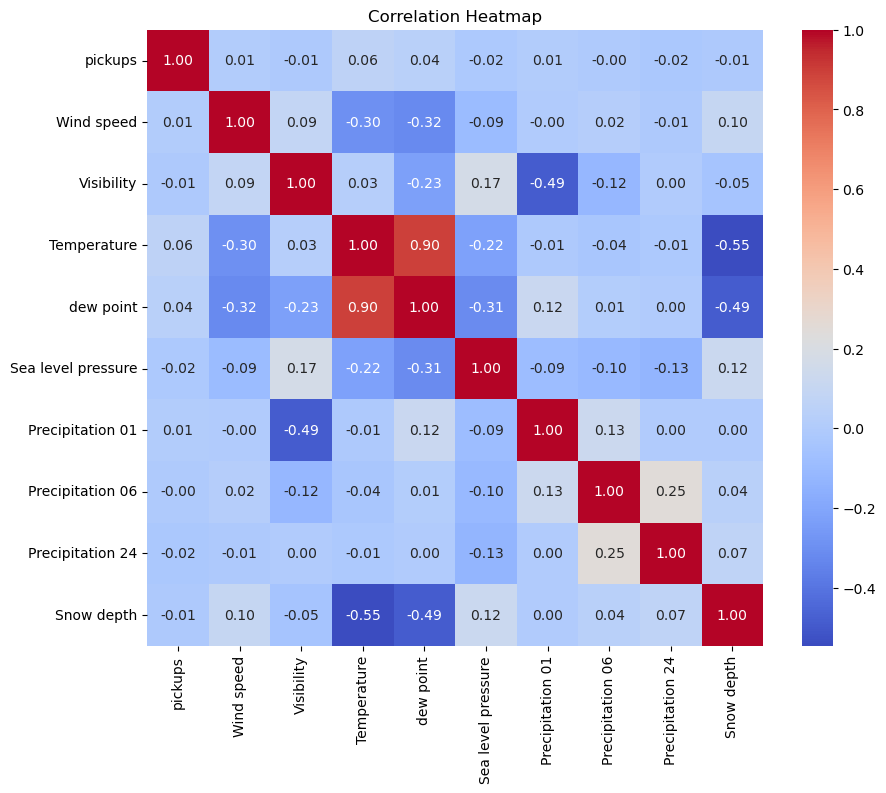

In [76]:
# Create a heatmap
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

The correlation (r-value) between pickups and the Wind speed is 0.01
The r-squared is: 0.0


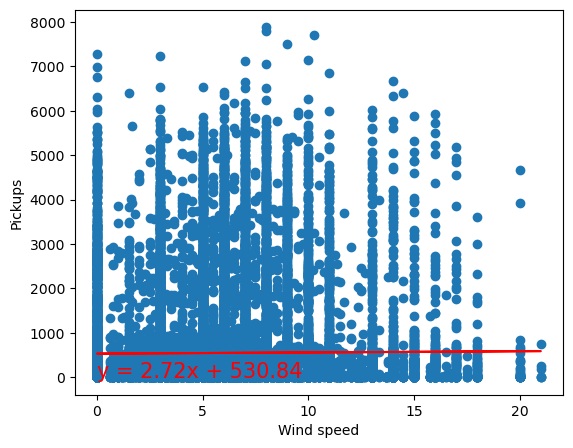

The correlation (r-value) between pickups and the Visibility is -0.01
The r-squared is: 0.0


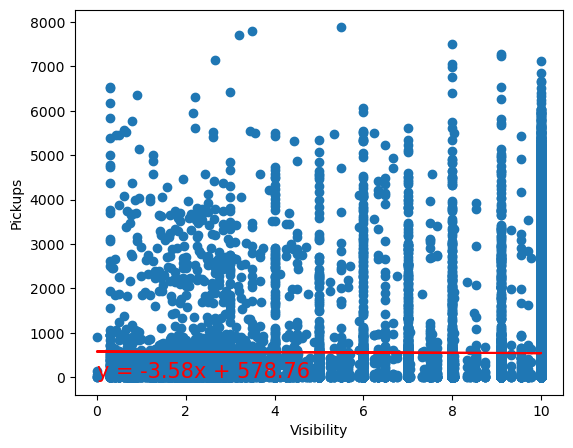

The correlation (r-value) between pickups and the Temperature is 0.06
The r-squared is: 0.0


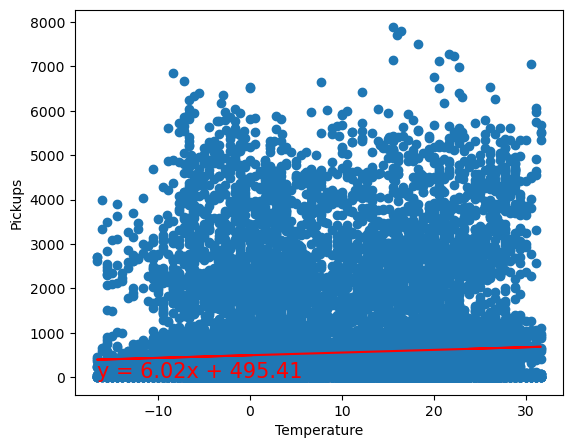

The correlation (r-value) between pickups and the dew point is 0.04
The r-squared is: 0.0


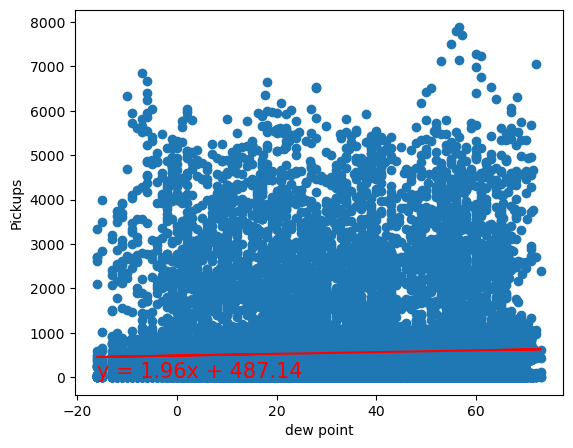

The correlation (r-value) between pickups and the Sea level pressure is -0.02
The r-squared is: 0.0


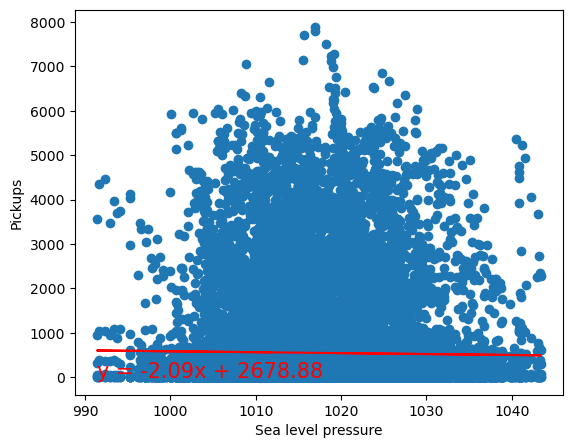

The correlation (r-value) between pickups and the Precipitation 01 is 0.01
The r-squared is: 0.0


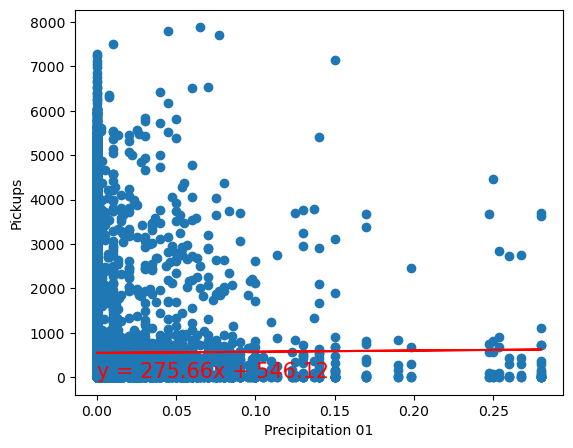

The correlation (r-value) between pickups and the Precipitation 06 is -0.0
The r-squared is: 0.0


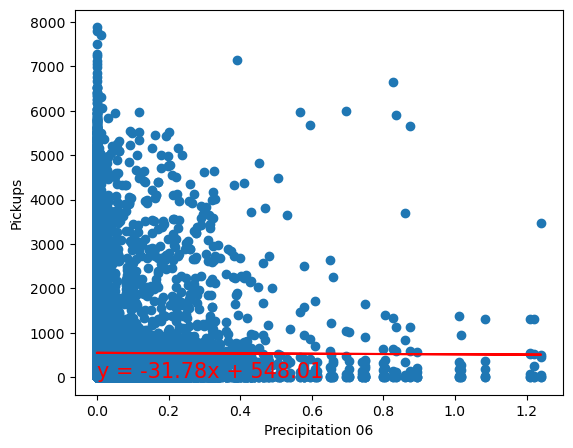

The correlation (r-value) between pickups and the Precipitation 24 is -0.02
The r-squared is: 0.0


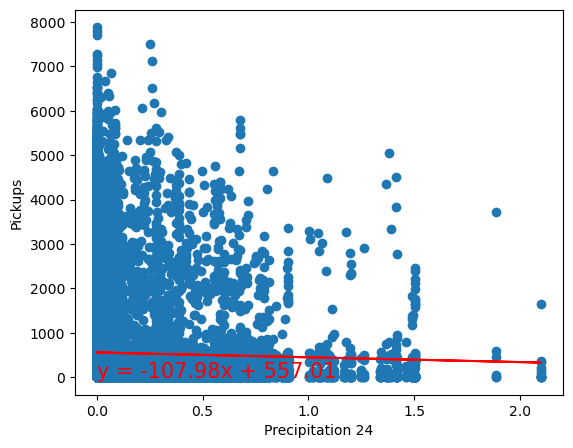

The correlation (r-value) between pickups and the Snow depth is -0.01
The r-squared is: 0.0


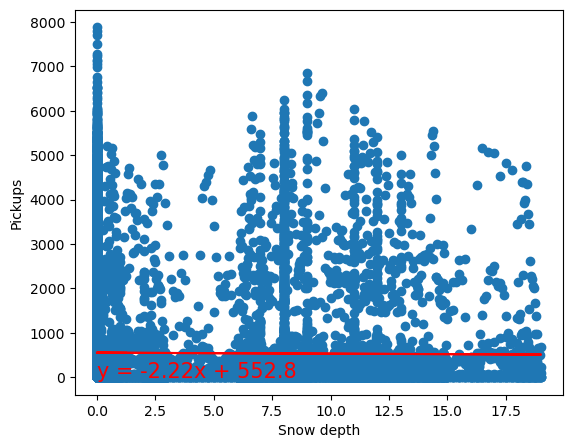

In [77]:
# List of variables for analysis
variable_list = ['Wind speed','Visibility', 'Temperature', 'dew point', 'Sea level pressure',
       'Precipitation 01', 'Precipitation 06', 'Precipitation 24',
       'Snow depth']

# Iterate through each variable and perform data analysis
for variable in variable_list:
    # Extract 'pickups' data from the DataFrame
    pickups = df['pickups']
    
    # Extract the data for the current variable
    variable_data = df[variable]
    
    # Calculate the correlation (r-value) between 'pickups' and the current variable
    correlation = st.pearsonr(variable_data, pickups)
    
    # Print the correlation coefficient, rounded to two decimal places
    print(f"The correlation (r-value) between pickups and the {variable} is {round(correlation[0], 2)}")
    
    # Create a new matplotlib figure with a specified size
    plt.figure(figsize=(6.3, 5))
    
    # Perform linear regression analysis
    (slope, intercept, rvalue, pvalue, stderr) = linregress(variable_data, pickups)
    
    # Calculate the values predicted by the linear regression model
    regress_values = (variable_data * slope + intercept)
    
    # Create a string representing the equation of the regression line
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create a scatter plot of the current variable against 'pickups'
    plt.scatter(variable_data, pickups)
    
    # Plot the regression line in red
    plt.plot(variable_data, regress_values, "r-")
    
    # Annotate the plot with the regression equation
    plt.annotate(line_eq, (min(variable_data), min(pickups)), fontsize=15, color="red")
    
    # Set labels for the y-axis and x-axis
    plt.ylabel("Pickups")
    plt.xlabel(f"{variable}")
    
    # Print the r-squared value (coefficient of determination), rounded to two decimal places
    print(f"The r-squared is: {round(rvalue**2, 2)}")
    
    # Display the plots
    plt.show()

In [78]:
boroughs = df['borough'].unique()
months = df['month'].unique()

correlation_list = []
hour = []
borough = []
month = []
r_squared = []
for borough_name in boroughs:
    for month_name in months:
        for hour_value in range(24):
            borough_data = df[(df['month'] == month_name) & (df['borough'] == borough_name) & (df['hour'] == hour_value)]
            pickups = borough_data['pickups']
            variable_data = borough_data['Temperature']
            correlation = st.pearsonr(variable_data, pickups)[0]
            correlation_list.append(correlation)
            hour.append(hour_value)
            borough.append(borough_name)
            month.append(month_name)
            (slope, intercept, rvalue, pvalue, stderr) = linregress(variable_data, pickups)
            rsquared = round(rvalue**2, 2)
            r_squared.append(rsquared)

corr_df = pd.DataFrame({"corr": correlation_list,"r_squared":r_squared, "hour": hour, "borough": borough, "month": month})
# Find the top three maximum correlations
top_max_corr_rows = corr_df.nlargest(10, 'corr')

# Find the top three minimum correlations
top_min_corr_rows = corr_df.nsmallest(10, 'corr')

# Print the results for top three maximum correlations
print("Top Ten Positive Correlations for Temperature:")
print(top_max_corr_rows)

# Print the results for top three minimum correlations
print("\nTop Ten Negative Correlations for Temperature:")
print(top_min_corr_rows)

Top Ten Positive Correlations for Temperature:
         corr  r_squared  hour        borough    month
599  0.431722       0.19    23         Queens  January
591  0.428427       0.18    15         Queens  January
593  0.415894       0.17    17         Queens  January
594  0.409767       0.17    18         Queens  January
598  0.406015       0.16    22         Queens  January
295  0.365636       0.13     7            EWR  January
356  0.361628       0.13    20            EWR    March
720  0.352390       0.12     0  Staten Island  January
576  0.351071       0.12     0         Queens  January
823  0.348731       0.12     7  Staten Island      May

Top Ten Negative Correlations for Temperature:
         corr  r_squared  hour    borough     month
467 -0.695821       0.48    11  Manhattan  February
468 -0.672604       0.45    12  Manhattan  February
475 -0.484330       0.23    19  Manhattan  February
476 -0.453397       0.21    20  Manhattan  February
477 -0.442677       0.20    21  Manhatta

The correlation (r-value) between pickups and the Temperature is -0.7
The r-squared is: 0.48


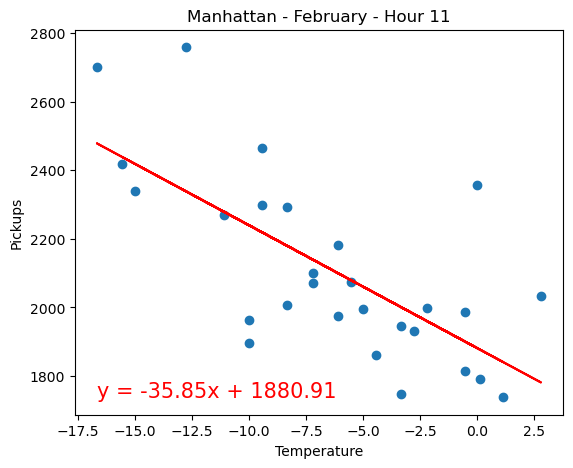

In [79]:
# Filter data for January in the Manhattan at 24 hour 

data = df[(df['month'] == 'February') & (df['borough'] == 'Manhattan') & (df['hour'] == 11)]
pickups = data['pickups']
variable_data = data['Temperature']

# Calculate the correlation (r-value) between 'pickups' and the current variable
correlation = st.pearsonr(variable_data, pickups)
    
# Print the correlation coefficient, rounded to two decimal places
print(f"The correlation (r-value) between pickups and the Temperature is {round(correlation[0], 2)}")
    
# Create a new matplotlib figure with a specified size
plt.figure(figsize=(6.3, 5))
    
# Perform linear regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(variable_data, pickups)
    
# Calculate the values predicted by the linear regression model
regress_values = (variable_data * slope + intercept)
    
# Create a string representing the equation of the regression line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
# Create a scatter plot of the current variable against 'pickups'
plt.scatter(variable_data, pickups)
    
# Plot the regression line in red
plt.plot(variable_data, regress_values, "r-")
    
# Annotate the plot with the regression equation
plt.annotate(line_eq, (min(variable_data), min(pickups)), fontsize=15, color="red")
    
# Set labels for the y-axis and x-axis
plt.xlabel('Temperature')
plt.ylabel("Pickups")
plt.title(f"Manhattan - February - Hour 11")
    
# Print the r-squared value (coefficient of determination), rounded to two decimal places
print(f"The r-squared is: {round(rvalue**2, 2)}")

# Display the plots
plt.show()


The correlation (r-value) between pickups and the Temperature is 0.43
The r-squared is: 0.19


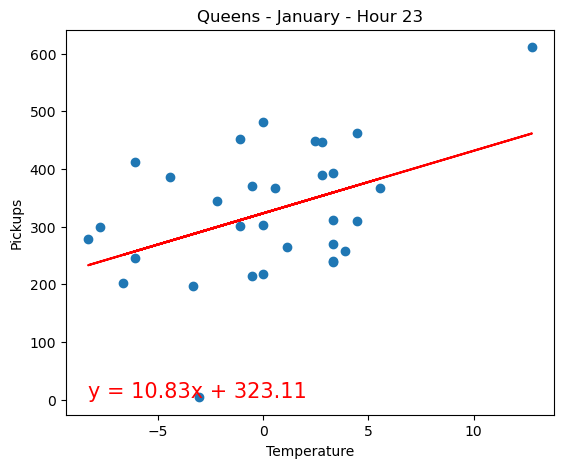

In [80]:
# Filter data for January in the Manhattan at 24 hour 

data = df[(df['month'] == 'January') & (df['borough'] == 'Queens') & (df['hour'] == 23)]
pickups = data['pickups']
variable_data = data['Temperature']

# Calculate the correlation (r-value) between 'pickups' and the current variable
correlation = st.pearsonr(variable_data, pickups)
    
# Print the correlation coefficient, rounded to two decimal places
print(f"The correlation (r-value) between pickups and the Temperature is {round(correlation[0], 2)}")
    
# Create a new matplotlib figure with a specified size
plt.figure(figsize=(6.3, 5))
    
# Perform linear regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(variable_data, pickups)
    
# Calculate the values predicted by the linear regression model
regress_values = (variable_data * slope + intercept)
    
# Create a string representing the equation of the regression line
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
# Create a scatter plot of the current variable against 'pickups'
plt.scatter(variable_data, pickups)
    
# Plot the regression line in red
plt.plot(variable_data, regress_values, "r-")
    
# Annotate the plot with the regression equation
plt.annotate(line_eq, (min(variable_data), min(pickups)), fontsize=15, color="red")
    
# Set labels for the y-axis and x-axis
plt.xlabel('Temperature')
plt.ylabel("Pickups")

plt.title(f"Queens - January - Hour 23")
    
# Print the r-squared value (coefficient of determination), rounded to two decimal places
print(f"The r-squared is: {round(rvalue**2, 2)}")

# Display the plots

plt.show()

In [81]:
variable_list = ['Wind speed','Visibility', 'Temperature', 'dew point', 'Sea level pressure',
       'Precipitation 01', 'Precipitation 06', 'Precipitation 24',
       'Snow depth']

boroughs = df['borough'].unique()
months = df['month'].unique()

for variable in variable_list:
    correlation_list = []
    hour = []
    borough = []
    month = []

    for borough_name in boroughs:
        for month_name in months:
            for hour_value in range(24):
                borough_data = df[(df['month'] == month_name) & (df['borough'] == borough_name) & (df['hour'] == hour_value)]
                pickups = borough_data['pickups']
                variable_data = borough_data[variable]
                correlation = st.pearsonr(variable_data, pickups)[0]
                correlation_list.append(correlation)
                hour.append(hour_value)
                borough.append(borough_name)
                month.append(month_name)
                

    corr_df = pd.DataFrame({"corr": correlation_list, "hour": hour, "borough": borough, "month": month})
    # Find the top three maximum correlations
    top_max_corr_rows = corr_df.nlargest(10, 'corr')

    # Find the top three minimum correlations
    top_min_corr_rows = corr_df.nsmallest(10, 'corr')

    # Print the results for top three maximum correlations
    print(f"Top Ten Positive Correlations for {variable}:")
    print(top_max_corr_rows)

    # Print the results for top three minimum correlations
    print(f"\nTop Ten Negative Correlations for {variable}:")
    print(top_min_corr_rows)
    print(f"\n")
    print("****************************************************")
    print(f"\n")

Top Ten Positive Correlations for Wind speed:
         corr  hour        borough     month
518  0.461280    14      Manhattan     April
466  0.438325    10      Manhattan  February
678  0.409053     6         Queens       May
470  0.390732    14      Manhattan  February
804  0.387556    12  Staten Island     April
534  0.384975     6      Manhattan       May
753  0.382015     9  Staten Island  February
154  0.371142    10       Brooklyn   January
284  0.357773    20       Brooklyn      June
799  0.351267     7  Staten Island     April

Top Ten Negative Correlations for Wind speed:
         corr  hour        borough     month
737 -0.497007    17  Staten Island   January
665 -0.471265    17         Queens     April
668 -0.439092    20         Queens     April
726 -0.419877     6  Staten Island   January
350 -0.417540    14            EWR     March
795 -0.381434     3  Staten Island     April
39  -0.354225    15          Bronx  February
99  -0.353997     3          Bronx       May
91  -0.

In [82]:
variable_list = ['Wind speed', 'Visibility', 'Temperature', 'dew point', 'Sea level pressure',
                 'Precipitation 01', 'Precipitation 06', 'Precipitation 24', 'Snow depth']

boroughs = df['borough'].unique()
months = df['month'].unique()

for variable in variable_list:
    correlation_list = []
    hour = []
    borough = []
    month = []
    r_squared = []

    for borough_name in boroughs:
        for month_name in months:
            for hour_value in range(24):
                borough_data = df[(df['month'] == month_name) & (df['borough'] == borough_name) & (df['hour'] == hour_value)]
                pickups = borough_data['pickups']
                variable_data = borough_data[variable]
                
                # Check if all variable_data values are identical
                if all(variable_data == variable_data.iloc[0]):
                    # Skip linear regression calculation
                    correlation = 0  # You can set it to 0 or any other value
                else:
                    # Calculate the Pearson correlation coefficient
                    correlation = st.pearsonr(variable_data, pickups)[0]

                correlation_list.append(correlation)
                hour.append(hour_value)
                borough.append(borough_name)
                month.append(month_name)
                
                # Calculate R-squared
                if correlation != 0:  # Skip if correlation is 0
                    (slope, intercept, rvalue, pvalue, stderr) = linregress(variable_data, pickups)
                    rsquared = round(rvalue**2, 2)
                    r_squared.append(rsquared)
                else:
                    r_squared.append(0)

    corr_df = pd.DataFrame({"corr": correlation_list, "r_squared": r_squared, "hour": hour, "borough": borough, "month": month})
    # Find the top ten maximum correlations
    top_max_corr_rows = corr_df.nlargest(10, 'corr')

    # Find the top ten minimum correlations
    top_min_corr_rows = corr_df.nsmallest(10, 'corr')

    # Print the results for top ten maximum correlations
    print(f"Top Ten Positive Correlations for {variable}:")
    print(top_max_corr_rows)

    # Print the results for top ten minimum correlations
    print(f"\nTop Ten Negative Correlations for {variable}:")
    print(top_min_corr_rows)

    # Print the results for top ten R-squared values
    top_r_squared_rows = corr_df.nlargest(10, 'r_squared')
    print(f"\nTop Ten R-squared Values for {variable}:")
    print(top_r_squared_rows)

    print("****************************************************\n")


Top Ten Positive Correlations for Wind speed:
         corr  r_squared  hour        borough     month
518  0.461280       0.21    14      Manhattan     April
466  0.438325       0.19    10      Manhattan  February
678  0.409053       0.17     6         Queens       May
470  0.390732       0.15    14      Manhattan  February
804  0.387556       0.15    12  Staten Island     April
534  0.384975       0.15     6      Manhattan       May
753  0.382015       0.15     9  Staten Island  February
154  0.371142       0.14    10       Brooklyn   January
284  0.357773       0.13    20       Brooklyn      June
799  0.351267       0.12     7  Staten Island     April

Top Ten Negative Correlations for Wind speed:
         corr  r_squared  hour        borough     month
737 -0.497007       0.25    17  Staten Island   January
665 -0.471265       0.22    17         Queens     April
668 -0.439092       0.19    20         Queens     April
726 -0.419877       0.18     6  Staten Island   January
350 -0.4175

In [83]:
variable_list = ['Wind speed','Visibility', 'Temperature', 'dew point', 'Sea level pressure',
       'Precipitation 01', 'Precipitation 06', 'Precipitation 24',
       'Snow depth']


for variable in variable_list:
    correlation_list = []
    hour = []
    month = []

    for month_name in months:
        for hour_value in range(24):
            borough_data = df[(df['month'] == month_name) & (df['borough'] == "Manhattan") & (df['hour'] == hour_value)]
            pickups = borough_data['pickups']
            variable_data = borough_data[variable]
            correlation = st.pearsonr(variable_data, pickups)[0]
            correlation_list.append(correlation)
            hour.append(hour_value)
            month.append(month_name)

    corr_df = pd.DataFrame({"corr": correlation_list, "hour": hour, "borough": "Manhattan", "month": month})
    # Find the top three maximum correlations
    top_max_corr_rows = corr_df.nlargest(10, 'corr')

    # Find the top three minimum correlations
    top_min_corr_rows = corr_df.nsmallest(10, 'corr')

    # Print the results for top three maximum correlations
    print(f"Top Ten Positive Correlations for {variable}:")
    print(top_max_corr_rows)

    # Print the results for top three minimum correlations
    print(f"\nTop Ten Negative Correlations for {variable}:")
    print(top_min_corr_rows)
    print(f"\n")
    print("****************************************************")
    print(f"\n")

Top Ten Positive Correlations for Wind speed:
         corr  hour    borough     month
86   0.461280    14  Manhattan     April
34   0.438325    10  Manhattan  February
38   0.390732    14  Manhattan  February
102  0.384975     6  Manhattan       May
84   0.339549    12  Manhattan     April
32   0.326254     8  Manhattan  February
44   0.312917    20  Manhattan  February
39   0.303205    15  Manhattan  February
33   0.300958     9  Manhattan  February
115  0.286401    19  Manhattan       May

Top Ten Negative Correlations for Wind speed:
         corr  hour    borough     month
55  -0.347419     7  Manhattan     March
117 -0.323493    21  Manhattan       May
112 -0.309620    16  Manhattan       May
135 -0.307338    15  Manhattan      June
64  -0.282373    16  Manhattan     March
99  -0.276551     3  Manhattan       May
6   -0.276258     6  Manhattan   January
100 -0.263480     4  Manhattan       May
68  -0.254894    20  Manhattan     March
26  -0.235203     2  Manhattan  February


***

In [84]:
variable_list = ['Wind speed','Visibility', 'Temperature', 'dew point', 'Sea level pressure',
       'Precipitation 01', 'Precipitation 06', 'Precipitation 24',
       'Snow depth']


for variable in variable_list:
    correlation_list = []
    hour = []
    month = []

    for month_name in months:
        for hour_value in range(24):
            borough_data = df[(df['month'] == month_name) & (df['borough'] == "Bronx") & (df['hour'] == hour_value)]
            pickups = borough_data['pickups']
            variable_data = borough_data[variable]
            correlation = st.pearsonr(variable_data, pickups)[0]
            correlation_list.append(correlation)
            hour.append(hour_value)
            month.append(month_name)

    corr_df = pd.DataFrame({"corr": correlation_list, "hour": hour, "borough": "Bronx", "month": month})
    # Find the top three maximum correlations
    top_max_corr_rows = corr_df.nlargest(10, 'corr')

    # Find the top three minimum correlations
    top_min_corr_rows = corr_df.nsmallest(10, 'corr')

    # Print the results for top three maximum correlations
    print(f"Top Ten Positive Correlations for {variable}:")
    print(top_max_corr_rows)

    # Print the results for top three minimum correlations
    print(f"\nTop Ten Negative Correlations for {variable}:")
    print(top_min_corr_rows)
    print(f"\n")
    print("****************************************************")
    print(f"\n")

Top Ten Positive Correlations for Wind speed:
         corr  hour borough     month
134  0.320161    14   Bronx      June
34   0.312549    10   Bronx  February
84   0.271113    12   Bronx     April
90   0.260474    18   Bronx     April
140  0.256059    20   Bronx      June
33   0.224363     9   Bronx  February
15   0.220900    15   Bronx   January
57   0.212544     9   Bronx     March
52   0.199542     4   Bronx     March
127  0.196096     7   Bronx      June

Top Ten Negative Correlations for Wind speed:
         corr  hour borough     month
39  -0.354225    15   Bronx  February
99  -0.353997     3   Bronx       May
91  -0.353831    19   Bronx     April
47  -0.345100    23   Bronx  February
115 -0.335308    19   Bronx       May
106 -0.323754    10   Bronx       May
26  -0.293210     2   Bronx  February
24  -0.292140     0   Bronx  February
37  -0.290704    13   Bronx  February
100 -0.270647     4   Bronx       May


****************************************************


Top Ten Positi

In [85]:
variable_list = ['Wind speed','Visibility', 'Temperature', 'dew point', 'Sea level pressure',
       'Precipitation 01', 'Precipitation 06', 'Precipitation 24',
       'Snow depth']


for variable in variable_list:
    correlation_list = []
    hour = []
    month = []

    for month_name in months:
        for hour_value in range(24):
            borough_data = df[(df['month'] == month_name) & (df['borough'] == "Brooklyn") & (df['hour'] == hour_value)]
            pickups = borough_data['pickups']
            variable_data = borough_data[variable]
            correlation = st.pearsonr(variable_data, pickups)[0]
            correlation_list.append(correlation)
            hour.append(hour_value)
            month.append(month_name)

    corr_df = pd.DataFrame({"corr": correlation_list, "hour": hour, "borough": "Brooklyn", "month": month})
    # Find the top three maximum correlations
    top_max_corr_rows = corr_df.nlargest(10, 'corr')

    # Find the top three minimum correlations
    top_min_corr_rows = corr_df.nsmallest(10, 'corr')

    # Print the results for top three maximum correlations
    print(f"Top Ten Positive Correlations for {variable}:")
    print(top_max_corr_rows)

    # Print the results for top three minimum correlations
    print(f"\nTop Ten Negative Correlations for {variable}:")
    print(top_min_corr_rows)
    print(f"\n")
    print("****************************************************")
    print(f"\n")

Top Ten Positive Correlations for Wind speed:
         corr  hour   borough     month
10   0.371142    10  Brooklyn   January
140  0.357773    20  Brooklyn      June
34   0.320796    10  Brooklyn  February
84   0.295590    12  Brooklyn     April
33   0.287839     9  Brooklyn  February
79   0.263596     7  Brooklyn     April
32   0.259888     8  Brooklyn  February
83   0.258648    11  Brooklyn     April
57   0.253183     9  Brooklyn     March
82   0.240181    10  Brooklyn     April

Top Ten Negative Correlations for Wind speed:
         corr  hour   borough     month
47  -0.345136    23  Brooklyn  February
37  -0.338194    13  Brooklyn  February
100 -0.299440     4  Brooklyn       May
99  -0.287043     3  Brooklyn       May
106 -0.283343    10  Brooklyn       May
88  -0.278270    16  Brooklyn     April
26  -0.273057     2  Brooklyn  February
108 -0.263930    12  Brooklyn       May
27  -0.262897     3  Brooklyn  February
111 -0.260198    15  Brooklyn       May


*************************

In [86]:
variable_list = ['Wind speed','Visibility', 'Temperature', 'dew point', 'Sea level pressure',
       'Precipitation 01', 'Precipitation 06', 'Precipitation 24',
       'Snow depth']


for variable in variable_list:
    correlation_list = []
    hour = []
    month = []

    for month_name in months:
        for hour_value in range(24):
            borough_data = df[(df['month'] == month_name) & (df['borough'] == "Queens") & (df['hour'] == hour_value)]
            pickups = borough_data['pickups']
            variable_data = borough_data[variable]
            correlation = st.pearsonr(variable_data, pickups)[0]
            correlation_list.append(correlation)
            hour.append(hour_value)
            month.append(month_name)

    corr_df = pd.DataFrame({"corr": correlation_list, "hour": hour, "borough": "Queens", "month": month})
    # Find the top three maximum correlations
    top_max_corr_rows = corr_df.nlargest(10, 'corr')

    # Find the top three minimum correlations
    top_min_corr_rows = corr_df.nsmallest(10, 'corr')

    # Print the results for top three maximum correlations
    print(f"Top Ten Positive Correlations for {variable}:")
    print(top_max_corr_rows)

    # Print the results for top three minimum correlations
    print(f"\nTop Ten Negative Correlations for {variable}:")
    print(top_min_corr_rows)
    print(f"\n")
    print("****************************************************")
    print(f"\n")

Top Ten Positive Correlations for Wind speed:
         corr  hour borough     month
102  0.409053     6  Queens       May
49   0.346078     1  Queens     March
101  0.332080     5  Queens       May
10   0.297085    10  Queens   January
71   0.283794    23  Queens     March
48   0.282506     0  Queens     March
32   0.275035     8  Queens  February
51   0.268357     3  Queens     March
50   0.259954     2  Queens     March
12   0.247696    12  Queens   January

Top Ten Negative Correlations for Wind speed:
         corr  hour borough    month
89  -0.471265    17  Queens    April
92  -0.439092    20  Queens    April
88  -0.340332    16  Queens    April
110 -0.336108    14  Queens      May
142 -0.296659    22  Queens     June
99  -0.288630     3  Queens      May
100 -0.260975     4  Queens      May
17  -0.254755    17  Queens  January
82  -0.248968    10  Queens    April
72  -0.234374     0  Queens    April


****************************************************


Top Ten Positive Correlat

In [87]:
variable_list = ['Wind speed','Visibility', 'Temperature', 'dew point', 'Sea level pressure',
       'Precipitation 01', 'Precipitation 06', 'Precipitation 24',
       'Snow depth']


for variable in variable_list:
    correlation_list = []
    hour = []
    month = []

    for month_name in months:
        for hour_value in range(24):
            borough_data = df[(df['month'] == month_name) & (df['borough'] == "Staten Island") & (df['hour'] == hour_value)]
            pickups = borough_data['pickups']
            variable_data = borough_data[variable]
            correlation = st.pearsonr(variable_data, pickups)[0]
            correlation_list.append(correlation)
            hour.append(hour_value)
            month.append(month_name)

    corr_df = pd.DataFrame({"corr": correlation_list, "hour": hour, "borough": "Staten Island", "month": month})
    # Find the top three maximum correlations
    top_max_corr_rows = corr_df.nlargest(10, 'corr')

    # Find the top three minimum correlations
    top_min_corr_rows = corr_df.nsmallest(10, 'corr')

    # Print the results for top three maximum correlations
    print(f"Top Ten Positive Correlations for {variable}:")
    print(top_max_corr_rows)

    # Print the results for top three minimum correlations
    print(f"\nTop Ten Negative Correlations for {variable}:")
    print(top_min_corr_rows)
    print(f"\n")
    print("****************************************************")
    print(f"\n")

Top Ten Positive Correlations for Wind speed:
         corr  hour        borough     month
84   0.387556    12  Staten Island     April
33   0.382015     9  Staten Island  February
79   0.351267     7  Staten Island     April
135  0.347247    15  Staten Island      June
117  0.317648    21  Staten Island       May
19   0.290509    19  Staten Island   January
14   0.278747    14  Staten Island   January
110  0.277641    14  Staten Island       May
11   0.276187    11  Staten Island   January
86   0.270287    14  Staten Island     April

Top Ten Negative Correlations for Wind speed:
        corr  hour        borough     month
17 -0.497007    17  Staten Island   January
6  -0.419877     6  Staten Island   January
75 -0.381434     3  Staten Island     April
78 -0.320586     6  Staten Island     April
24 -0.314878     0  Staten Island  February
37 -0.311497    13  Staten Island  February
83 -0.298008    11  Staten Island     April
67 -0.289637    19  Staten Island     March
2  -0.279471    

In [88]:
variable_list = ['Wind speed','Visibility', 'Temperature', 'dew point', 'Sea level pressure',
       'Precipitation 01', 'Precipitation 06', 'Precipitation 24',
       'Snow depth']


for variable in variable_list:
    correlation_list = []
    hour = []
    month = []

    for month_name in months:
        for hour_value in range(24):
            borough_data = df[(df['month'] == month_name) & (df['borough'] == "EWR") & (df['hour'] == hour_value)]
            pickups = borough_data['pickups']
            variable_data = borough_data[variable]
            correlation = st.pearsonr(variable_data, pickups)[0]
            correlation_list.append(correlation)
            hour.append(hour_value)
            month.append(month_name)

    corr_df = pd.DataFrame({"corr": correlation_list, "hour": hour, "borough": "EWR", "month": month})
    # Find the top three maximum correlations
    top_max_corr_rows = corr_df.nlargest(10, 'corr')

    # Find the top three minimum correlations
    top_min_corr_rows = corr_df.nsmallest(10, 'corr')

    # Print the results for top three maximum correlations
    print(f"Top Ten Positive Correlations for {variable}:")
    print(top_max_corr_rows)

    # Print the results for top three minimum correlations
    print(f"\nTop Ten Negative Correlations for {variable}:")
    print(top_min_corr_rows)
    print(f"\n")
    print("****************************************************")
    print(f"\n")

Top Ten Positive Correlations for Wind speed:
         corr  hour borough    month
105  0.304311     9     EWR      May
109  0.290749    13     EWR      May
87   0.290039    15     EWR    April
102  0.287510     6     EWR      May
116  0.269597    20     EWR      May
60   0.261195    12     EWR    March
7    0.165823     7     EWR  January
101  0.153418     5     EWR      May
68   0.134899    20     EWR    March
15   0.129734    15     EWR  January

Top Ten Negative Correlations for Wind speed:
         corr  hour borough     month
62  -0.417540    14     EWR     March
131 -0.300579    11     EWR      June
136 -0.295448    16     EWR      June
104 -0.269352     8     EWR       May
137 -0.236955    17     EWR      June
129 -0.221840     9     EWR      June
140 -0.213156    20     EWR      June
31  -0.177501     7     EWR  February
56  -0.173199     8     EWR     March
113 -0.169045    17     EWR       May


****************************************************


Top Ten Positive Correlat